In [37]:
#Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read file
brands = pd.read_json('brands.json', lines=True)

In [9]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [8]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   string 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(5), string(1)
memory usage: 73.1+ KB


In [6]:
#Check missing value
na_table = brands.isna().sum()
na_table/len(brands)

_id             0.000000
barcode         0.000000
category        0.132819
categoryCode    0.556984
cpg             0.000000
name            0.000000
topBrand        0.524422
brandCode       0.200514
dtype: float64

In [7]:
#Deal woth data format/type issue
#id(dict -> string)
new_id = []
id_list = brands['_id'].tolist()
for i in id_list:
    new_id.append(i['$oid'])
brands['_id'] = new_id 
brands['_id'] = brands['_id'].astype('string')

In [32]:
#cpg(dict -> two columns(cpg_id and cpg_ref))
cpg_id=[]
cpg_ref=[]
for i in range(len(brands)):   
    cpg_id.append(brands['cpg'][i]['$id']['$oid'])
    cpg_ref.append(brands['cpg'][i]['$ref'])
brands['cpg_id'] = cpg_id
brands['cpg_ref'] = cpg_ref
brands.drop(columns='cpg', inplace=True)

In [52]:
#Duplicate Check
brands.duplicated().sum()

0

<AxesSubplot:xlabel='category', ylabel='count'>

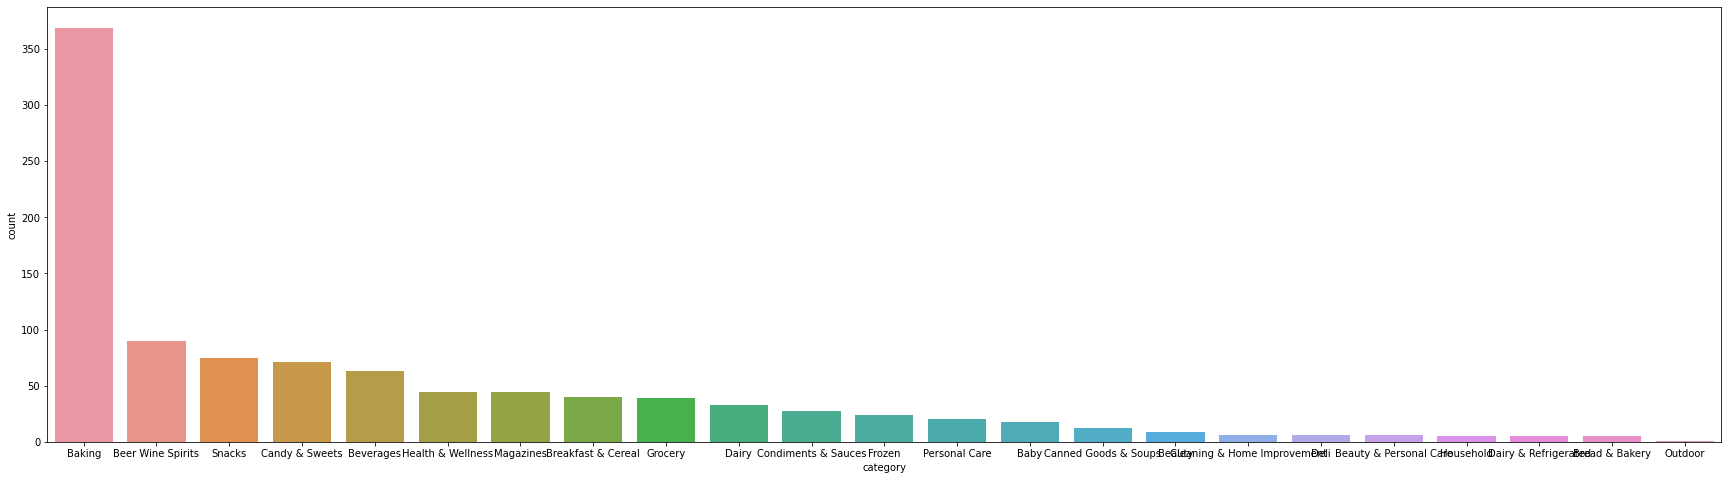

In [45]:
#Check imbalance
category_prop = pd.DataFrame(brands['category'].value_counts())
category_prop.reset_index(inplace=True)
category_prop.rename(columns={'index':'category', 'category':'count'},inplace=True)
plt.figure(figsize = (30,8))
sns.barplot(x='category', y='count',data=category_prop)

<AxesSubplot:xlabel='cpg_ref', ylabel='count'>

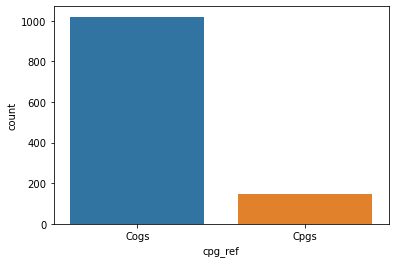

In [48]:
cpg_ref_prop = pd.DataFrame(brands['cpg_ref'].value_counts())
cpg_ref_prop.reset_index(inplace=True)
cpg_ref_prop.rename(columns={'index':'cpg_ref', 'cpg_ref':'count'},inplace=True)
sns.barplot(x='cpg_ref', y='count',data=cpg_ref_prop)

Data Quality Issues:
1. Wrong data type issue.
2. Missing value in the dataset.
3. Aware of imbalance in 'category', 'cpg_ref' if we want to do more analysis or build models.